In [2]:
import pandas as pd
import numpy as np
import os
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'xtick.color':'w','ytick.color':'w','axes.labelcolor':'gold'})
import japanize_matplotlib

## ファイル読み込み

In [3]:
def mk_dataframe(path):
    """
    pathに元ずいてdataframeを作る。
    path:str
        train or test/pos or neg
    files:list
        text data to read
    """
    data = []
    files = [x for x in os.listdir(path) if x.endswith('.txt') ]
    
    for text_name in files:
        # ファイルを読み込む
        with open(path+text_name,'r') as text_data:
            text = text_data.read()
        # IDとreview読み込み
        text_num = text_name.rstrip('.txt')
        ID,review = text_num.split('_')
        #  バイナリー値の代入
        if int(review) >= 7:
            label = "1"
        elif int(review) <= 4:
            label = "0"
        else:
            label = ""
        data.append([ID,review,label,text])
    df = pd.DataFrame(data,columns=['ID','review','label','text'],index=None)
    return df

In [4]:
# それぞれのデータを読み込む
train_pos_df = mk_dataframe('../aclImdb/train/pos/')
train_neg_df = mk_dataframe('../aclImdb/train/neg/')
test_pos_df = mk_dataframe('../aclImdb/test/pos/')
test_neg_df = mk_dataframe('../aclImdb/test/neg/')

In [5]:
def shuffle_data(pos_data,neg_data):
    '''
    posとnegのdataframeを結合する
    '''
    full_df = pd.concat([pos_data,neg_data]).sample(frac=1,random_state=1)
    return full_df
    



In [6]:
# 訓練用とテスト用データの作成
train_df = shuffle_data(train_pos_df,train_neg_df)
test_df = shuffle_data(test_pos_df,test_neg_df)
train_df.shape,test_df.shape
train_df.head(10)

,ID,review,label,text
8992,9774,1,0,"Hubert Selby Jr. gave us the book ""Requiem For..."
9488,2956,8,1,There are very few performers today who can ke...
4433,398,3,0,C'mon guys some previous reviewers have nearly...
104,10502,4,0,The movie has several story lines that follow ...
8222,5102,7,1,"don't mind the soundtrack, which is played out..."
9110,6968,7,1,Just as the new BSG wasn't what fans of the or...
8696,6235,1,0,Well done Al Gore! You have become the first p...
4693,6805,1,0,I ve finished seeing the movie 10 minutes ago....
11346,210,4,0,"Maybe you shouldn't compare, but Wild Style an..."
10415,6507,10,1,"This series, produced at probably the most pro..."


In [7]:
# 文章のサンプル表示
HTML(train_df.text.iloc[0])

In [8]:
# ユニークな評価数 ラベル数
print('review:\n{0}\nlabel:\n{1}'.format(train_df.review.value_counts(),train_df.label.value_counts()))

review:
1     5100
10    4732
8     3009
4     2696
7     2496
3     2420
2     2284
9     2263
Name: review, dtype: int64
label:
0    12500
1    12500
Name: label, dtype: int64


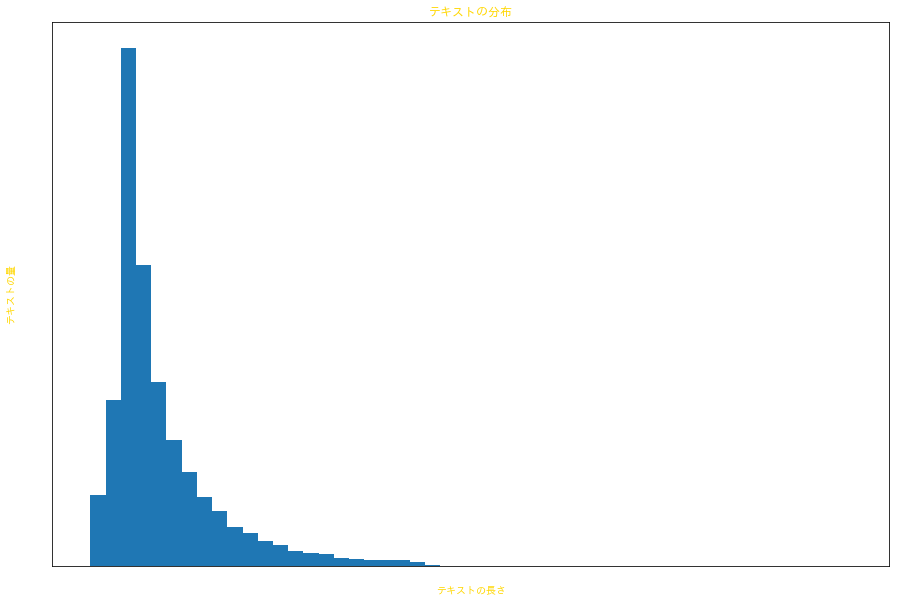

In [9]:
plt.figure(figsize=(15, 10))
plt.hist([len(sample) for sample in list(train_df.text)], 50)
plt.xlabel('テキストの長さ')
plt.ylabel('テキストの量')
plt.title('テキストの分布',color='gold')
plt.show()

## 前処理(labelを使う場合)

In [10]:
# X,yにデータを分ける
train_data = train_df.iloc[:,2:]
train_X = train_df.iloc[:,3].values
train_y = train_df.iloc[:,2].values
print(train_y.shape)

(25000,)


In [11]:
# 単語のダミーの作成
from sklearn.feature_extraction.text import CountVectorizer
CountVector = CountVectorizer()
docs =  train_X
bag = CountVector.fit_transform(docs)
print(CountVector.vocabulary_)

{'hubert': 31942, 'selby': 58683, 'jr': 35627, 'gave': 26959, 'us': 70492, 'the': 66339, 'book': 8377, 'requiem': 55114, 'for': 25450, 'dream': 20040, 'and': 3258, 'co': 13050, 'wrote': 73853, 'screenplay': 58273, 'to': 67125, 'aronofsky': 4292, 'movie': 44147, 'of': 46680, 'it': 34683, 'that': 66322, 'succeeded': 64084, 'on': 46916, 'every': 22760, 'level': 38507, 'by': 9962, 'delivering': 17358, 'an': 3167, 'intimate': 34244, 'unbiased': 69124, 'portrait': 50943, 'horrors': 31695, 'characters': 11635, 'lives': 39072, 'vices': 71236, 'destroyed': 17911, 'them': 66376, 'last': 37840, 'exit': 23082, 'brooklyn': 9278, 'still': 63226, 'has': 29999, 'vice': 71233, 'multiple': 44365, 'living': 39079, 'sad': 57047, 'but': 9881, 'hardly': 29848, 'does': 19421, 'same': 57283, 'justice': 35788, 'did': 18292, 'br': 8724, 'film': 24536, 'seems': 58611, 'laughably': 37920, 'anti': 3606, 'gay': 26975, 'at': 4753, 'times': 66943, 'especially': 22482, 'when': 72753, 'in': 33004, 'homosexuality': 3147

In [12]:
# # ダミー化させた特徴量の抽出
train_X_features = bag.toarray()
print(train_X_features.shape)

(25000, 74849)


In [13]:
# ボキャブラリーの全体像
vocab = CountVector.get_feature_names()
print(vocab)

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m', '100min', '100mph', '100s', '100th', '100x', '100yards', '101', '101st', '102', '102nd', '103', '104', '1040', '1040a', '1040s', '105', '1050', '105lbs', '106', '106min', '107', '108', '109', '10am', '10lines', '10mil', '10min', '10minutes', '10p', '10pm', '10s', '10star', '10th', '10x', '10yr', '11', '110', '1100', '11001001', '1100ad', '111', '112', '1138', '114', '1146', '115', '116', '117', '11f', '11m', '11th', '12', '120', '1200', '1200f', '1201', '1202', '123', '12383499143743701', '125', '125m', '127', '128', '12a', '12hr', '12m', '12mm', '12s', '12th', '13', '130', '1300', '1300s', '131', 

In [14]:
# ボキャブラリーの数それぞれ
dist = np.sum(train_X_features,axis=0)
print(dist)

[ 93 300   1 ...   1   4   1]


In [15]:
print("count:word")
for word,count in zip(vocab,dist):
    print("{0}:{1}".format(count,word))

count:word
93:00
300:000
1:0000000000001
2:00001
1:00015
1:000s
3:001
1:003830
1:006
19:007
1:0079
4:0080
2:0083
1:0093638
4:00am
4:00pm
6:00s
29:01
1:01pm
17:02
1:020410
1:029
7:03
7:04
1:041
14:05
1:050
14:06
1:06th
12:07
11:08
1:087
1:089
1:08th
8:09
1:0f
1:0ne
1:0r
1:0s
4351:10
460:100
45:1000
1:1000000
2:10000000000000
1:1000lb
2:1000s
2:1001
1:100b
1:100k
1:100m
2:100min
1:100mph
2:100s
6:100th
2:100x
1:100yards
52:101
2:101st
19:102
1:102nd
6:103
8:104
1:1040
1:1040a
1:1040s
12:105
1:1050
1:105lbs
5:106
1:106min
6:107
7:108
5:109
1:10am
1:10lines
1:10mil
1:10min
1:10minutes
1:10p
3:10pm
6:10s
1:10star
16:10th
3:10x
1:10yr
370:11
15:110
4:1100
1:11001001
1:1100ad
2:111
6:112
2:1138
2:114
1:1146
4:115
5:116
5:117
1:11f
1:11m
29:11th
330:12
17:120
4:1200
1:1200f
1:1201
1:1202
3:123
1:12383499143743701
3:125
1:125m
1:127
3:128
3:12a
1:12hr
2:12m
1:12mm
1:12s
13:12th
262:13
2:130
1:1300
2:1300s
3:131
1:1318
2:132
3:134
6:135
1:135m
3:136
1:137
4:138
1:139
1:13k
2:13s
85:13th
209:14
1

14:adrien
15:adrienne
1:adriensen
9:adrift
5:adroit
3:adroitly
40:ads
1:adt
1:adulating
5:adulation
1:adulhood
511:adult
1:adulterate
1:adulterated
2:adulterer
7:adulteress
1:adulteries
20:adulterous
39:adultery
29:adulthood
1:adultism
1:adultry
376:adults
17:adv
1:advan
101:advance
90:advanced
23:advancement
5:advancements
40:advances
17:advancing
16:advani
153:advantage
1:advantaged
1:advantageous
17:advantages
13:advent
2:adventist
5:adventists
510:adventure
1:adventured
12:adventurer
8:adventurers
204:adventures
4:adventuresome
2:adventuring
33:adventurous
1:adventurously
2:adventurousness
1:adversarial
14:adversaries
18:adversary
11:adverse
2:adversely
2:adversities
25:adversity
14:advert
9:advertise
62:advertised
29:advertisement
25:advertisements
4:advertisers
9:advertises
91:advertising
2:advertized
11:adverts
259:advice
3:advices
1:advisable
90:advise
57:advised
2:advisedly
1:advisement
21:adviser
5:advisers
14:advises
4:advising
2:advision
6:advisor
5:advisors
4:advisory
2:ad

14:apples
1:applewhite
5:appliance
10:appliances
2:applicability
9:applicable
4:applicant
2:applicants
10:application
3:applications
48:applied
48:applies
55:apply
19:applying
1:appoach
2:appoint
24:appointed
12:appointment
2:appointments
2:appoints
1:appolina
4:appollo
1:appollonia
1:appologise
1:appologize
7:appolonia
1:apporiate
1:apporting
2:apposed
6:apposite
1:appr
3:appraisal
1:appraisals
1:appraise
5:appreciable
2:appreciably
507:appreciate
196:appreciated
19:appreciates
15:appreciating
88:appreciation
18:appreciative
1:appreciator
1:appreciators
1:appreciatted
4:apprehend
5:apprehended
2:apprehending
7:apprehension
1:apprehensions
6:apprehensive
34:apprentice
2:apprenticeship
1:apprised
372:approach
3:approachable
55:approached
63:approaches
59:approaching
1:approporiately
221:appropriate
5:appropriated
77:appropriately
1:appropriates
1:appropriating
3:appropriation
1:appropriations
31:approval
22:approve
31:approved
1:approves
3:approving
8:approx
1:approxamitly
1:approxiamte

13:baywatch
2:baz
1:bazaar
1:bazar
1:bazeley
2:bazillion
8:bazooka
3:bazookas
11:bazza
11:bb
174:bbc
7:bbc1
6:bbc2
2:bbc3
2:bbca
1:bbe
3:bbfc
1:bbm
4:bbq
2:bbs
18:bc
2:bci
1:bcs
2:bd
3:bdsm
1:bdus
1:bdwy
26957:be
7:bea
191:beach
1:beacham
1:beachboys
2:beachcomber
1:beachcombers
3:beached
22:beaches
1:beachfront
1:beachhead
1:beachwear
1:beack
8:beacon
2:bead
2:beaded
2:beadle
21:beads
1:beady
1:beagle
1:beaham
2:beahan
1:beak
5:beaker
2:beal
10:beale
7:beales
13:beals
13:beam
5:beamed
9:beaming
3:beamont
15:beams
45:bean
1:beanbag
3:beane
1:beanies
4:beano
1:beanpoles
26:beans
1:beany
251:bear
37:bearable
1:bearbado
1:bearcats
47:beard
17:bearded
6:beards
1:beardsley
1:beardy
1:beared
13:bearer
4:bearers
48:bearing
5:bearings
140:bears
3:beart
2:beasley
187:beast
6:beastiality
3:beastie
3:beasties
7:beastly
2:beastmaster
18:beasts
1:beasty
354:beat
2:beatdown
124:beaten
3:beater
1:beaters
2:beatific
2:beatiful
1:beatin
138:beating
16:beatings
11:beatle
1:beatlemania
1:beatlemaniac
74:

90:brutally
26:brute
2:brutes
14:brutish
1:brutishness
1:bruton
1:brutsman
1:brutti
3:brutus
32:bryan
1:bryans
2:bryanston
20:bryant
2:brycer
2:bryden
1:brylcreem
1:brynhild
17:brynner
4:bryson
1:brücke
18:bs
1:bsa
1:bsers
63:bsg
1:bsm
8:btas
33:btk
65:btw
3:bu
5:buah
4:buaku
2:bub
1:buba
24:bubba
1:bubban
2:bubbas
59:bubble
10:bubblegum
1:bubbler
18:bubbles
12:bubbling
1:bubblingly
15:bubbly
1:bubby
1:bubi
9:bubonic
1:bucatinsky
6:buccaneer
1:buccaneering
1:buccaneers
1:buccella
1:bucco
1:buch
6:buchanan
6:bucharest
8:buchfellner
2:buchholz
1:buchinsky
1:buchman
175:buck
5:buckaroo
1:buckaroos
3:bucke
1:bucked
35:bucket
1:bucketful
1:bucketfuls
1:bucketloads
21:buckets
1:buckheimer
3:bucking
2:buckingham
10:buckle
1:buckled
1:buckles
4:buckley
2:buckmaster
3:buckner
124:bucks
1:buckshot
1:bucktoothed
6:bucktown
2:buckwheat
5:bucolic
1:bucsemi
83:bud
1:budah
1:budakon
22:budapest
3:budd
7:buddha
1:buddhas
10:buddhism
18:buddhist
1:buddhists
109:buddies
41:budding
1:buddist
1:buddwing
2

10:chemist
490:chemistry
1:chemists
3:chemotherapy
1:chemotrodes
1:chemstrand
1:chemystry
39:chen
12:cheney
16:cheng
1:chennai
7:chenoweth
1:cheoreography
1:cheorgraphed
7:cheque
1:chequered
1:cheques
68:cher
3:cherbourg
1:cherche
1:cherchez
1:cheree
8:cheri
13:cherie
1:cherise
26:cherish
19:cherished
5:cherishes
3:cherishing
1:chernitsky
3:cherokee
1:cherri
22:cherry
1:cherryred
2:chertkov
1:chertok
2:cherub
3:cherubic
1:cherubino
2:cherubs
22:cheryl
2:chesapeake
2:cheshire
1:chesley
96:chess
3:chessboard
1:chessecake
1:chessy
93:chest
2:chestburster
7:chested
28:chester
2:chesterton
1:chestful
1:chesticles
8:chestnut
5:chestnuts
6:chests
4:chesty
1:cheswick
2:chet
1:chetas
1:chetnik
1:chetniks
38:cheung
1:cheungs
2:chevalia
3:chevalier
1:chevening
1:chevette
1:chevincourt
1:chevrolet
39:chevy
46:chew
17:chewbacca
1:chewbaka
9:chewed
1:chewer
5:chewie
46:chewing
25:chews
2:chewy
14:cheyenne
1:cheyney
2:chez
1:chhaliya
2:chhaya
1:chhote
14:chi
3:chia
8:chiaki
6:chianese
2:chiang
1:chia

21:constructive
3:constructively
1:constructor
8:constructs
1:construe
9:construed
1:consuela
3:consuelo
1:consuelor
1:consul
4:consulate
1:consult
17:consultant
2:consultants
1:consultation
7:consulted
1:consulting
2:consults
11:consume
38:consumed
16:consumer
13:consumerism
4:consumerist
14:consumers
8:consumes
19:consuming
1:consumingly
26:consummate
5:consummated
1:consummately
1:consummates
1:consummation
26:consumption
1:consumptive
2:conséquence
1:cont
151:contact
1:contactable
10:contacted
1:contactees
7:contacting
31:contacts
1:contados
2:contagion
7:contagious
1:contagonists
156:contain
113:contained
11:container
7:containers
64:containing
3:containment
411:contains
1:contaminants
2:contaminate
21:contaminated
2:contaminates
3:contaminating
7:contamination
9:conte
1:contected
1:contemp
1:contempary
1:contemperaneous
34:contemplate
8:contemplated
2:contemplates
27:contemplating
10:contemplation
4:contemplations
11:contemplative
1:contemporaneity
4:contemporaneous
25:contempora

7:decapitations
2:decaprio
7:decarlo
1:decaune
1:decaunes
23:decay
5:decayed
20:decaying
1:decays
3:decca
82:deceased
23:deceit
7:deceitful
1:deceitfulness
12:deceive
14:deceived
2:deceiver
4:deceives
8:deceiving
2:deceivingly
41:december
39:decency
1157:decent
21:decently
1:decentred
33:deception
4:deceptions
19:deceptive
16:deceptively
1:deceptiveness
1:decerebrate
1:deceving
1:dechifered
1:decibels
482:decide
705:decided
58:decidedly
1:decider
546:decides
52:deciding
1:decieve
4:decimal
2:decimals
1:decimate
8:decimated
2:decimates
1:decimation
16:decipher
2:decipherable
2:deciphered
2:deciphering
240:decision
105:decisions
6:decisive
2:decisively
1:decivilization
42:deck
1:deckard
1:deckchair
8:decked
4:decker
1:decks
1:declaim
3:declaiming
2:declaims
2:declamatory
1:declan
21:declaration
2:declarations
1:declarative
29:declare
30:declared
31:declares
13:declaring
1:declassified
61:decline
18:declined
9:declines
13:declining
16:deco
3:decode
1:decoded
1:decoder
1:decodes
1:decoding

38:dive
1:dived
33:diver
3:diverge
2:diverged
1:divergence
1:divergences
3:divergent
5:diverges
12:divers
54:diverse
1:diversely
4:diversified
2:diversifying
22:diversion
7:diversions
47:diversity
10:divert
9:diverted
9:diverting
5:diverts
23:dives
18:divide
47:divided
1:dividend
2:dividends
1:divider
9:divides
5:dividing
1:divied
57:divine
1:divined
3:divinely
5:diviner
42:diving
1:divinities
2:divinity
41:division
1:divisional
5:divisions
4:divisive
1:divisiveness
1:divison
1:divoff
102:divorce
60:divorced
9:divorcee
5:divorces
3:divorcing
4:divorcée
1:divorcées
6:divulge
3:divulged
3:divulges
3:divulging
1:divvied
1:divvies
1:divvy
3:divx
7:divya
1:divyashakti
1:diwali
1:diwana
5:diwani
12:dix
1:dixen
5:dixie
4:dixit
94:dixon
1:dixton
5:diy
1:dizziness
20:dizzy
19:dizzying
1:dizzyingly
57:dj
1:djafaridze
1:djakarta
2:djalili
13:django
1:djian
1:djimon
1:djin
5:djinn
1:djjohn
2:djs
1:dk
5:dkd
1:dll
1:dlouhý
3:dm
1:dmax
4:dmd
1:dmd2222
2:dmv
1:dmytyk
2:dmz
24:dna
2:dnd
9176:do
4:doa
2

1:elopement
1:elopes
1:eloping
6:eloquence
20:eloquent
10:eloquently
2:elpidia
2:elrika
2:elrond
2:els
45:elsa
2001:else
1:elsehere
1:elsen
4:elses
1:elsewere
139:elsewhere
1:elsewheres
1:elsewise
3:elsie
2:elsinore
2:elson
3:elster
1:elstree
1:eltinge
21:elton
1:elucidate
2:elucidated
3:elucidation
1:elucubrate
5:elude
6:eluded
10:eludes
2:eluding
1:elusions
26:elusive
1:elusively
1:elusiveness
1:elven
18:elves
1:elvia
1:elvidge
153:elvira
2:elviras
154:elvis
1:elways
4:elwes
15:ely
1:elya
5:elyse
1:elysee
160:em
1:emaciated
33:email
1:emailed
8:emails
1:emaline
1:emanated
3:emanates
6:emanating
3:emancipated
5:emancipation
3:emancipator
1:emannuelle
1:emanuel
1:emanuele
6:emanuelle
1:emasculate
5:emasculated
2:emasculating
2:emasculation
2:embalmed
1:embalmer
1:embalming
1:embankment
1:embarasing
2:embarassed
1:embarasses
5:embarassing
1:embarassingly
2:embarassment
27:embark
1:embarkation
4:embarked
5:embarking
27:embarks
2:embarrasing
2:embarrasment
34:embarrass
163:embarrassed
7:e

4:fascistic
1:fascistoid
11:fascists
342:fashion
22:fashionable
3:fashionably
138:fashioned
3:fashioning
1:fashionista
43:fashions
1:fasinating
6:faso
56:fassbinder
1:fasso
895:fast
1:fastardization
1:fastball
1:fastballs
1:fastbreak
2:fasted
2:fasten
2:fastened
100:faster
11:fastest
2:fastforward
2:fastforwarding
6:fastidious
1:fastidiously
1:fastly
1:fastmoving
1:fastward
8:fastway
275:fat
2:fata
124:fatal
60:fatale
5:fatales
10:fatalism
10:fatalistic
1:fatalistically
2:fatalities
2:fatality
24:fatally
2:fatboy
1:fatcheek
271:fate
28:fated
26:fateful
1:fatefully
1:fateless
18:fates
1:fath
2124:father
7:fathered
4:fatherhood
1:fathering
2:fatherland
1:fatherlands
1:fatherless
1:fatherliness
8:fatherly
76:fathers
28:fathom
1:fathoming
3:fathoms
11:fatigue
4:fatigued
5:fatigues
3:fatih
3:fatness
3:fatone
3:fats
2:fatso
2:fatted
1:fattened
3:fatter
1:fattish
18:fatty
1:fatu
6:fatuous
9:faubourg
6:faucet
1:faudel
1:fauke
2:faulk
6:faulkner
240:fault
7:faulted
11:faultless
1:faultline
97:f

2:furballs
1:furbies
1:furdion
1:furgusson
2:furia
5:furie
2:furies
82:furious
4:furiously
1:furlings
18:furlong
3:furlough
1:furls
1:furmann
6:furnace
1:furnaces
4:furnish
9:furnished
1:furnishes
4:furnishing
7:furnishings
56:furniture
1:furo
1:furred
3:furrier
2:furrowed
30:furry
5:furs
11:furst
1:furtado
576:further
1:furtherance
2:furthered
6:furthering
106:furthermore
3:furthers
2:furthest
1:furtilized
3:furtive
1:furura
83:fury
1:fusanosuke
15:fuse
4:fused
2:fuselage
5:fuses
2:fusing
9:fusion
38:fuss
1:fussbudget
11:fussy
2:futher
25:futile
1:futilely
17:futility
1:futon
1:futterman
1:futur
4:futurama
1:futuramafan1987
900:future
1:futureistic
9:futures
1:futurescape
1:futureworld
1:futurise
2:futurism
120:futuristic
1:futuristically
1:futz
1:fuurin
9:fuzz
3:fuzzies
1:fuzziness
52:fuzzy
1:fw
1:fwd
1:fwwm
121:fx
1:fxs
1:fyall
2:fye
8:fyi
1:fying
1:fym
1:fyodor
1:fyrom
1:fysical
1:fysicaly
1:féminin
2:fête
4:fêtes
1:för
1:förflutet
3:führer
1:fürmann
2:g1
1:g2
1:g3
1:g4
2:g7
1:g8
1

4:hadith
1:hadj
1:hadled
57:hadley
1:hadleys
5:hadleyville
2:hadly
281:hadn
1:hadnt
2:hae
1:haefengstal
7:haenel
3:haese
1:haev
3:haff
1:haft
1:hafte
13:hag
8:hagan
31:hagar
2:hagarty
1:hagel
1:hagelin
30:hagen
3:hagerthy
3:hagerty
25:haggard
1:haggardly
6:haggerty
3:haggis
2:haggle
1:haggling
1:hagia
4:hagiography
3:hags
2:hague
9:hah
33:haha
1:hahah
13:hahaha
1:hahahah
6:hahahaha
4:hahahahaha
1:hahahahhahhaha
1:hahahhaa
11:hahk
4:hahn
1:haht
19:hai
1:haid
1:haiduck
2:haiduk
2:haifa
6:haig
1:haige
2:haigh
1:haight
11:haiku
25:hail
24:hailed
4:hailing
4:hails
1:hailsham
1:hailstones
1:hailstorm
29:haim
17:hain
2:haine
54:haines
1:hainey
505:hair
1:hairball
1:hairband
1:hairbrained
23:haircut
13:haircuts
1:hairdewed
23:hairdo
1:hairdoed
6:hairdos
10:hairdresser
1:hairdressers
3:hairdressing
1:hairdryer
75:haired
4:hairless
4:hairline
1:hairpieces
1:hairpin
14:hairs
1:hairshirts
10:hairspray
19:hairstyle
19:hairstyles
1:hairstylist
40:hairy
3:haiti
1:haitian
1:haitians
3:haj
3:haje
6:haj

3:hud
2:huddle
4:huddled
1:huddles
2:huddling
2:hudgens
141:hudson
2:hudsucker
3:hue
1:hued
1:huertas
11:hues
4:huet
3:huey
3:huff
1:huffing
3:huffman
1:huffs
36:hug
945:huge
62:hugely
3:huggable
6:huggaland
4:hugged
2:hugger
1:huggers
1:huggie
1:huggies
19:hugging
10:huggins
1:huggy
112:hugh
74:hughes
2:hughie
2:hughly
45:hugo
2:hugon
9:hugs
5:hugsy
1:hugues
1:hugwagon
138:huh
1:huhuhuhuhu
4:hui
3:huit
1:huitieme
3:huitième
2:hujan
1:huk
1:hukum
12:hula
1:hulbert
16:hulce
4:hulchul
64:hulk
3:hulkamaniacs
13:hulking
11:hull
3:hullabaloo
1:hulled
1:hulme
1:hultén
6:hulu
1:hulya
65:hum
1:humaine
1596:human
26:humane
2:humanely
1:humanimal
1:humanisation
1:humanise
1:humanises
11:humanism
8:humanist
13:humanistic
3:humanitarian
1:humanitarianism
1:humanitarians
1:humanitas
3:humanities
282:humanity
1:humanization
4:humanize
3:humanized
5:humanizes
7:humanizing
8:humankind
10:humanly
3:humanness
14:humanoid
3:humanoids
319:humans
1:humberfloob
1:humberto
94:humble
1:humbled
3:humbleness
2:

1:jain
2:jaipur
4:jaitley
1:jaja
2:jakarta
160:jake
4:jakes
1:jakie
1:jaku
5:jakub
2:jal
2:jalal
1:jalapeno
1:jalees
1:jaliyl
3:jalopy
1:jalouse
2:jalousie
40:jam
1:jama
1:jamacian
4:jamaican
2:jamal
2:jambalaya
1:jamboree
2:jame
1068:james
1:jamesbondish
1:jameses
34:jameson
4:jamestown
1:jami
128:jamie
12:jammed
2:jammer
2:jammin
7:jamming
4:jamon
1:jampacked
1:jamrom4
5:jams
1:jamshied
58:jan
1:jana
1:jancie
657:jane
28:janeane
4:janeiro
4:janel
1:janelle
5:janes
46:janet
2:janette
2:janetty
17:janeway
14:jang
1:jangles
2:jangling
18:janice
6:janie
1:janikowski
1:janina
24:janine
7:janis
1:janit
35:janitor
3:janitorial
3:janitors
1:janne
4:jannetty
2:jannick
1:janning
23:jannings
2:jannsen
1:jannuci
16:janos
1:janosch
1:janowski
1:jans
1:jansch
16:jansen
1:jansens
1:janset
1:janson
8:janssen
34:january
3:janus
1:jaongi
1:jaoui
4:jap
292:japan
1:japanamation
1:japanes
716:japanese
1:japanse
3:japenese
1:japery
1:japes
1:japnanese
1:japon
2:japonese
7:japp
3:japrisot
7:japs
8:jaq
3:ja

2:latrina
3:latrine
1:latrines
1:lattanzi
4:latte
362:latter
1:latterday
1:lattes
1:lattices
1:lattuada
1:lattés
2:laturi
2:latvia
2:latvian
20:lau
1:laud
2:laudable
1:laudably
1:laudanum
2:laudatory
4:laude
18:lauded
7:laudenbach
1:lauder
2:lauderdale
1:laudrup
1:lauen
1:laufther
1375:laugh
424:laughable
82:laughably
368:laughed
5:laugher
1:laughers
1:laughfest
528:laughing
4:laughingly
2:laughless
7:laughlin
1:laughometer
658:laughs
244:laughter
3:laughters
2:laughting
8:laughton
1:laughtrack
1:laughtracks
1:laughworthy
1:laugthers
49:launch
38:launched
12:launcher
8:launchers
9:launches
22:launching
1:launchpad
2:laundered
4:laundering
1:laundress
4:laundrette
4:laundromat
25:laundry
5:launius
2:lauper
1:laupta
166:laura
1:laural
1:laurdale
1:laure
1:laureate
1:laureen
121:laurel
2:laurels
62:lauren
75:laurence
1:laurens
5:laurent
2:laurenti
1:laurentiis
1:laurentis
1:laurents
1:laurenz
59:laurie
1:lauro
2:laustsen
1:lauter
4:lautrec
1:lauuughed
14:lava
1:lavagirl
1:lavant
3:lavator

1:marciano
3:marcie
18:marco
1:marconi
1:marcos
41:marcus
2:marcuse
2:marcuzzo
14:marcy
9:mard
18:mardi
18:mare
1:maren
1:marenghi
1:mareno
114:margaret
1:margareta
5:margarete
7:margarethe
4:margaretta
3:margarine
5:margarita
2:margaritas
10:margaux
7:marge
13:margheriti
1:margie
11:margin
16:marginal
1:marginalisation
2:marginalised
1:marginalization
2:marginalize
6:marginalized
1:marginalizes
30:marginally
1:margineanus
3:margins
2:margit
10:margo
4:margolin
1:margolis
2:margolyes
8:margot
4:margotta
13:margret
2:marguerite
2:marguis
3:margulies
2:mari
175:maria
2:mariachi
3:mariage
5:mariah
8:marian
6:mariana
1:marianbad
1:mariangela
18:marianne
1:mariano
3:maricarmen
2:marichal
253:marie
8:mariel
1:marielitos
2:marielle
4:marienbad
1:marienthal
1:mariesa
1:marietta
10:mariette
2:marihuana
1:mariiines
1:marija
1:marijauna
42:marijuana
1:marilee
2:marilla
9:marilu
54:marilyn
17:marin
25:marina
1:marinaro
1:marinate
2:marinated
47:marine
10:mariner
39:marines
1:marinescus
5:marino
99

5:moderator
1:moderators
929:modern
1:moderne
1:modernisation
3:modernised
4:modernism
7:modernist
1:modernistic
1:modernists
6:modernity
8:modernization
1:modernizations
2:modernize
9:modernized
2:modernizing
2:moderns
6:modes
62:modest
9:modestly
122:modesty
23:modicum
7:modification
3:modifications
9:modified
3:modifies
4:modify
2:modifying
24:modine
1:modot
4:mods
1:modular
1:modulate
7:modulated
1:modulating
2:modulation
6:module
5:modus
65:moe
1:moebius
1:moed
1:moeurs
4:moffat
3:moffett
3:mofo
1:mofu
5:mog
1:moggies
12:mogul
1:mogule
4:moguls
12:moh
3:mohabbatein
1:mohamad
2:mohamed
3:mohammad
5:mohammed
1:mohammedan
8:mohan
5:mohandas
14:mohanlal
1:mohanty
1:mohave
6:mohawk
3:mohd
1:mohican
4:mohicans
3:mohnish
18:mohr
11:moi
1:moimeme
1:moines
1:moins
3:moira
6:moist
1:moistness
1:moisture
1:moisturiser
1:moive
4:mojave
9:mojo
2:mok
1:mokey
1:moko
69:mol
1:mola
1:molars
10:molasses
34:mold
1:moldavia
5:molded
1:molden
1:molder
1:moldering
1:moldiest
1:molding
1:moldings
3:mold

7:oakley
1:oaks
1:oana
1:oar
11:oasis
5:oater
5:oaters
16:oates
9:oath
3:oaths
8:oatmeal
1:oats
5:oav
1:ob101
4:obama
1:obbsessed
4:obcession
1:obdurate
4:obedience
6:obedient
1:obediently
1:obee
1:obeisance
1:obeisances
1:obelisk
5:ober
1:oberman
3:oberoi
22:oberon
1:obers
17:obese
2:obesity
14:obey
5:obeying
5:obeys
2:obfuscated
20:obi
1:obit
1:obituaries
1:obituary
142:object
3:objected
2:objectification
1:objectified
1:objectifier
2:objectify
12:objection
10:objectionable
18:objections
79:objective
19:objectively
1:objectiveness
8:objectives
1:objectivist
1:objectivistic
11:objectivity
1:objectors
75:objects
1:oblast
1:obligate
16:obligated
1:obligates
26:obligation
5:obligations
70:obligatory
2:oblige
16:obliged
5:obliges
1:obliging
5:obligingly
1:obligortory
6:oblique
1:obliquely
3:obliterate
7:obliterated
2:obliterating
1:obliteration
37:oblivion
44:oblivious
3:obliviously
3:oblowitz
164:obnoxious
13:obnoxiously
1:obnoxiousness
1:oboe
1:oboro
1:obote
1:obout
3:obrow
1:obs
1:obsc

4:personage
4:personages
629:personal
157:personalities
338:personality
2:personalize
3:personalized
446:personally
1:personals
1:personalty
15:personas
1:personation
1:personia
9:personification
17:personified
7:personifies
1:personify
2:personifying
1:personl
1:personnage
1:personnal
1:personnallities
2:personnaly
26:personnel
90:persons
266:perspective
40:perspectives
2:perspicacious
1:perspiration
1:perspiring
1:persson
27:persuade
14:persuaded
1:persuaders
21:persuades
6:persuading
19:persuasion
1:persuasions
14:persuasive
3:persuasively
1:persuasiveness
1:persue
2:persuing
11:pert
1:pertain
1:pertained
7:pertaining
3:pertains
1:pertfectly
2:perth
1:pertinacity
1:pertinence
10:pertinent
6:perturbed
39:pertwee
1:pertwees
19:peru
3:peruse
2:perused
2:perusing
22:peruvian
1:peruvians
4:perv
4:pervaded
6:pervades
6:pervading
25:pervasive
1:pervasively
40:perverse
12:perversely
1:perverseness
28:perversion
8:perversions
6:perversity
40:pervert
45:perverted
1:perverting
1:pervertish
9:p

1:psycopaths
6:pt
1:pta
1:pterdactyl
3:pterodactyl
2:pterodactyls
1:pts
5:ptsd
1:ptss
7:pu
2:puaro
38:pub
1:pube
1:pubert
1:pubertal
19:puberty
1:pubes
15:pubescent
5:pubic
564:public
1:publically
11:publication
6:publications
1:publicdomain
1:publicise
3:publicised
13:publicist
3:publicists
67:publicity
6:publicize
7:publicized
19:publicly
2:publics
21:publish
60:published
22:publisher
6:publishers
9:publishing
1:publishist
6:pubs
2:pucci
2:puccini
1:puce
1:pucelle
1:puchase
2:puck
2:puckett
1:pucking
1:puckish
1:pucky
14:pudding
23:puddle
3:puddles
1:puddy
7:pudgy
1:pudney
1:pudor
1:pueblo
1:pueblos
1:puede
26:puerile
1:puerility
60:puerto
5:puertorican
4:puertoricans
1:puertorricans
1:puf
10:puff
5:puffed
7:puffing
3:puffinstuff
6:puffs
8:puffy
13:pufnstuf
3:pufnstuff
2:pug
2:pugh
1:pugilism
4:pugilist
1:pugilistic
1:pugs
1:pugsley
8:puh
1:puhleasssssee
1:puhleeeeze
3:pujari
1:pukar
1:pukara
27:puke
5:puked
3:pukes
1:pukey
10:puking
2:pulaski
2:pulasky
1:pulcherie
1:pulchritudinous


3:retch
2:retching
1:retcon
1:reteamed
1:reteaming
3:retell
35:retelling
3:retellings
3:retells
3:retention
3:retentive
1:retentively
1:retentiveness
15:rethink
2:rethinking
1:rethought
1:rethwisch
2:reticence
6:reticent
1:reties
1:retina
5:retinas
28:retire
82:retired
2:retiree
40:retirement
5:retires
7:retiring
1:retirony
11:retitled
7:retold
2:retool
1:retooled
1:retopologizes
3:retort
1:retorted
1:retorts
1:retrace
1:retraces
1:retracing
2:retract
2:retractable
1:retracted
23:retread
1:retreaded
3:retreads
26:retreat
1:retreated
5:retreating
10:retreats
19:retribution
1:retried
3:retrieval
36:retrieve
5:retrieved
11:retriever
7:retrieves
4:retrieving
40:retro
4:retrograde
6:retromedia
31:retrospect
17:retrospective
2:retrospectively
1:retrospectives
1:retrouvé
1:retsuden
1:rettig
624:return
117:returned
126:returning
307:returns
11:reuben
14:reubens
1:reunification
1:reunifying
151:reunion
4:reunions
47:reunite
40:reunited
15:reunites
10:reuniting
1:reunuin
5:reuse
9:reused
3:reusi

1:scurrilous
9:scurry
4:scurrying
6:scuttle
2:scuttled
1:scuttling
1:scuzziest
2:scuzziness
1:scuzzlebut
3:scuzzy
1:scwarz
1:scwatch
1:scylla
5:scythe
4:sd
2:sdp
44:se
15:se7en
1:se7ven
264:sea
2:seaboard
1:seach
1:seachange
6:seachd
1:seadly
1:seaduck
4:seafaring
3:seafood
2:seafront
156:seagal
2:seagall
7:seagals
1:seagle
1:seagoing
1:seagull
1:seagulls
2:seahunt
34:seal
32:sealed
1:sealer
3:sealing
13:seals
6:seam
15:seaman
2:seamanship
6:seamed
2:seamen
2:seamier
1:seaminess
19:seamless
22:seamlessly
1:seamlessness
10:seams
4:seamstress
1:seamus
5:seamy
263:sean
1:seances
14:seann
4:seaquest
1:sear
298:search
43:searched
11:searchers
29:searches
147:searching
1:searchlight
3:searcy
2:seared
1:seargent
9:searing
2:searingly
4:sears
27:seas
1:seasame
1:seascape
1:seascapes
1:seashell
1:seashore
2:seasick
3:seasickness
25:seaside
770:season
1:season1
1:season2
1:season3
9:seasonal
54:seasoned
1:seasoning
1:seasonings
237:seasons
1:seast
232:seat
23:seated
6:seater
4:seating
1:seatmate

2:slingshot
1:slink
4:slinking
6:slinky
56:slip
1:slipery
1:slipknot
33:slipped
15:slipper
11:slippers
9:slippery
19:slipping
36:slips
7:slipshod
11:slipstream
22:slit
3:slitheen
7:slither
1:slithered
2:slithers
1:slithis
2:slits
1:slitter
3:slitting
6:sliver
1:slivers
8:slo
11:sloan
37:sloane
29:slob
1:slobber
3:slobbering
1:slobbers
1:slobbery
1:slobbish
1:slobbishness
2:slobby
2:slobodan
3:slobs
9:slog
4:slogan
1:sloganeering
2:slogans
3:slogging
2:sloggy
1:slogs
2:slomo
1:slooooow
2:sloooow
1:sloooowly
12:slop
9:slope
2:sloper
5:slopes
1:slopped
2:sloppier
3:sloppiest
11:sloppily
10:sloppiness
1:sloppish
117:sloppy
2:slops
1:sloshed
2:sloshing
25:slot
19:sloth
2:sloths
1:slothy
2:slotnick
8:slots
5:slotted
4:slouch
1:slouches
4:slouching
1:slouchy
1:slough
1:sloughed
2:slovak
1:slovakian
1:slovene
9:slovenia
9:slovenian
3:slovenians
4:slovenly
6:slovik
1132:slow
2:slowdown
16:slowed
1:slowely
1:slowenian
47:slower
7:slowest
14:slowing
1:slowish
412:slowly
1:slowmo
1:slowmotion
11:s

2:stymie
3:stymied
1:stymieing
6:styne
2:stynwyck
10:styrofoam
3:styx
8:stéphane
1:störtebeker
14:su
2:suare
1:suares
4:suarez
42:suave
2:suavely
2:suavity
371:sub
4:suba
1:subaltern
1:subaru
5:subatomic
1:subbed
1:subbing
1:subcharacters
3:subcommander
30:subconscious
7:subconsciously
2:subconsciousness
1:subcontracted
1:subcontractor
7:subculture
2:subdivision
1:subdivisions
6:subdue
38:subdued
2:subdues
2:subduing
1:suberb
1:subfunctions
1:subgenera
12:subgenre
1:subgroup
4:subhuman
1:subhumans
1:subiaco
709:subject
79:subjected
9:subjecting
1:subjection
24:subjective
4:subjectively
1:subjectiveness
4:subjectivity
107:subjects
5:subjugated
1:subjugates
1:subjugating
2:subjugation
1:suble
1:sublety
1:sublimate
3:sublimated
1:sublimation
58:sublime
8:sublimely
15:subliminal
3:subliminally
4:sublimity
2:submachine
43:submarine
1:submariner
4:submariners
7:submarines
4:submerge
10:submerged
1:submerges
2:submerging
24:submission
1:submissions
7:submissive
1:submissiveness
34:submit
3:su

1:tightwad
2:tighty
1:tiglon
2:tigra
1:tigress
2:tijuana
2:tijuco
4:tiki
1:tiku
33:til
1:tila
9:tilda
4:tile
3:tiled
213:till
1:tillie
1:tillier
4:tillman
1:tillsammans
28:tilly
1:tilmac
1:tilman
1:tilse
16:tilt
8:tilted
1:tiltes
1:tilting
1:tilton
1:tilts
309:tim
1:tima
3:timber
1:timberflake
68:timberlake
2:timberlane
3:timbers
5:timbo
3:timbre
1:timbrook
1:timbuktu
12727:time
2:timebomb
1:timecode
4:timecop
1:timecrimes
41:timed
4:timeframe
1:timeing
121:timeless
7:timelessness
15:timeline
1:timelines
1:timeliness
21:timely
1:timemachine
1:timento
24:timer
12:timers
3239:times
1:timesfunny
1:timeshifts
1:timeslip
1:timeslot
5:timetable
1:timetables
1:timetraveling
1:timewarped
1:timewise
1:timeworn
1:timey
23:timid
3:timidity
2:timidly
169:timing
1:timler
5:timm
2:timmons
58:timmy
4:timo
94:timon
9:timone
6:timoner
1:timonn
1:timoteo
118:timothy
2:timpani
1:timsit
1:timur
41:tin
39:tina
1:tinder
1:tindersticks
1:tindle
1:tiness
4:ting
4:tinge
6:tinged
1:tinges
3:tingle
1:tingled
8:t

1:unmemorably
2:unmentionable
4:unmentioned
1:unmerciful
1:unmercilessly
1:unmerited
1:unmet
2:unmindful
13:unmissable
18:unmistakable
9:unmistakably
2:unmistakeably
9:unmitigated
1:unmodernized
1:unmolested
2:unmoored
19:unmotivated
4:unmoved
4:unmoving
1:unmysterious
1:unmystied
1:unnactractive
1:unnameable
31:unnamed
2:unnattractive
46:unnatural
8:unnaturally
1:unneccesary
1:unneccessary
44:unnecessarily
307:unnecessary
1:unnecessity
10:unneeded
2:unnerve
3:unnerved
37:unnerving
5:unnervingly
1:unnesicary
1:unninja
2:unnoticeable
23:unnoticed
1:unnuanced
1:uno
3:unobservant
1:unobserved
1:unobtainable
11:unobtrusive
1:unoccupied
14:unofficial
1:unofficially
1:unopened
2:unopposed
2:unorganized
83:unoriginal
4:unoriginality
1:unoriginals
21:unorthodox
1:unoticeable
1:unoutstanding
1:unowns
1:unpacking
4:unpaid
5:unpalatable
1:unpalatably
10:unparalleled
1:unpardonably
1:unparrallel
2:unpatriotic
1:unpatronising
1:unperceived
1:unperceptive
1:unpersons
1:unpersuasive
2:unperturbed
1:u

4:whitlock
2:whitlow
15:whitman
1:whitmire
4:whitmore
12:whitney
2:whitt
2:whittaker
1:whittemire
1:whittier
2:whittington
2:whittle
1:whittled
1:whitty
2:whitworth
16:whiz
2:whizbang
1:whizz
2:whizzing
2:whizzpopping
21441:who
27:whoa
1:whoah
25:whodunit
14:whodunnit
2:whodunnits
202:whoever
3078:whole
1:wholehearted
20:wholeheartedly
1:wholeness
1:wholes
7:wholesale
45:wholesome
1:wholesomely
4:wholesomeness
82:wholly
1:wholovesthesun
645:whom
26:whomever
1:whomevers
3:whoo
2:whooo
1:whoooole
6:whoop
1:whoopdedoodles
1:whooped
5:whoopee
84:whoopi
12:whoopie
4:whooping
4:whoops
1:whoopy
3:whoosh
1:whooshes
1:whooshing
1:whoosing
2:whopper
1:whoppers
3:whoppi
1:whoppie
13:whopping
1:whorde
48:whore
3:whored
8:whorehouse
15:whores
5:whoring
1:whorl
1:whorrible
18:whos
986:whose
1:whotta
1:whove
2:whovier
17:whoville
1:whow
1:whpat
1:whup
1:whupped
2:whuppin
5319:why
1:whycome
1:whyfore
4:whys
1:whytefox
1:whyyyy
4:wi
1:wiarton
1:wiata
3:wiccans
9:wich
8:wichita
118:wicked
25:wickedly
5:

## 機械学習モデル作成(labelを使う場合)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,auc

X_train,X_test,y_train,y_test = train_test_split(train_X_features,train_y)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score = accuracy_score(y_test.astype('int'),y_pred.astype('int'))
# auc_score = auc(y_test.astype('int'),y_pred.astype('int'))
roc_auc_score = roc_auc_score(y_test.astype('int'),y_pred.astype('int'))
print("accuracy_スコア:{0}\nroc_aucスコア:{1}\n".format(accuracy_score,roc_auc_score))

accuracy_スコア:0.84464
roc_aucスコア:0.8448087599614857



## 深層学習モデル作成(label使う場合)

In [16]:
# tensorflowとkerasのバージョン確認
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import layers

print(tf.VERSION)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


In [1]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_X_features,train_y)

#深層学習モデル作成

NameError: name 'train_X_features' is not defined

## Sequentialモデル